In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
# clean and write data to csv
cv = pd.read_csv('covid_data_raw.csv')
cv = cv[(cv["continent"]=="Europe") & (cv["indicator"] == "cases")]
cv.drop(["population", "country_code", "source", "rate_14_day", "cumulative_count", "indicator", "continent"], inplace=True, axis=1)

In [4]:
week_to_month = [
    "01","01","01","01","01",
    "02","02","02","02",
    "03","03","03","03",
    "04","04","04","04","04",
    "05","05","05","05",
    "06","06","06","06","06",
    "07","07","07","07",
    "08","08","08","08","08",
    "09","09","09","09",
    "10","10","10","10","10",
    "11","11","11","11",
    "12","12","12","12","12"]

cv["year_month"] = cv["year_week"].apply(lambda x: x[:5] + week_to_month[int(x[5:])])

In [5]:
cv.to_csv("covid_data.csv", index=False)
cv.head()

,country,weekly_count,year_week,year_month
376,Albania,2,2020-10,2020-03
377,Albania,40,2020-11,2020-03
378,Albania,47,2020-12,2020-03
379,Albania,123,2020-13,2020-04
380,Albania,149,2020-14,2020-04


In [6]:
gby = cv.groupby(["country", "year_month"]).sum().add_suffix('').reset_index()
gby.columns = ["country", "year_month", "month_count"]
gby.to_csv("covid_data_month.csv", index=False)
gby.head()

,country,year_month,month_count
0,Albania,2020-03,89
1,Albania,2020-04,637
2,Albania,2020-05,272
3,Albania,2020-06,1404
4,Albania,2020-07,2361


<AxesSubplot:xlabel='year_month'>

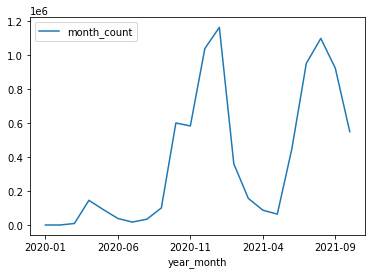

In [7]:
gby[gby["country"]=="United Kingdom"].plot(x="year_month", y="month_count", kind="line")

In [8]:
fb = pd.read_csv('../results_month.csv')
fb.head()

,country,year_month,neutral,home_win,away_win,games_played,goal_diff,win_rate
0,Austria,2010-03,0,1,0,1,1,1.0
1,Austria,2010-05,0,0,0,1,-1,0.0
2,Austria,2010-10,0,0,0,1,0,0.0
3,Austria,2010-11,0,0,0,1,-1,0.0
4,Austria,2011-02,0,0,0,1,-2,0.0


In [9]:
cv_fb = pd.merge(gby, fb, on=["country", "year_month"])
cv_fb.head()

,country,year_month,month_count,neutral,home_win,away_win,games_played,goal_diff,win_rate
0,Austria,2020-09,16248,0,0,0,1,-1,0.0
1,Austria,2020-10,67644,0,1,1,2,2,1.0
2,Austria,2020-11,167072,0,0,1,1,3,1.0
3,Austria,2021-03,77399,0,0,0,1,-4,0.0
4,Austria,2021-06,6090,1,0,0,3,-3,0.0


<AxesSubplot:xlabel='month_count', ylabel='goal_diff'>

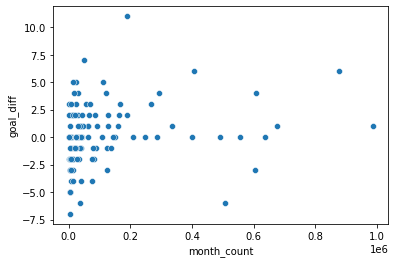

In [10]:
sns.scatterplot(data=cv_fb, x="month_count", y="goal_diff")

In [11]:
x = cv_fb["month_count"].to_numpy().reshape((-1, 1))
y = cv_fb["goal_diff"]
l_reg = LinearRegression().fit(x, y)

print(l_reg)

LinearRegression()


<AxesSubplot:xlabel='month_count', ylabel='goal_diff'>

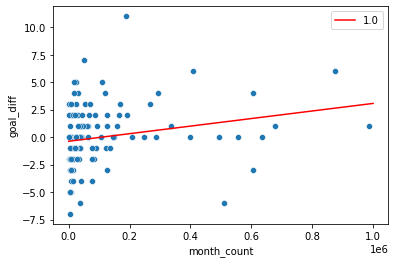

In [16]:
sns.scatterplot(data=cv_fb, x="month_count", y="goal_diff")

a,b = l_reg.coef_,l_reg.intercept_
x_line = np.linspace(0, 1000000, 1000)
y_line = x_line * a + b
sns.lineplot(x=x_line, y=y_line, palette=['r'], hue=np.ones(1000))

In [14]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              goal_diff   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.996
Date:                Wed, 17 Nov 2021   Prob (F-statistic):             0.0158
Time:                        15:12:47   Log-Likelihood:                -288.02
No. Observations:                 118   AIC:                             580.0
Df Residuals:                     116   BIC:                             585.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3736      0.300     -1.246      0.2